# Basic Image Transformations TRANSLATION,ROTATION AND HOMOTHETIE

We start by importing the basic libraries needed for the basic transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from PIL import Image as p

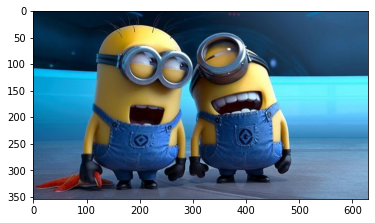

In [2]:
img=plt.imread("minion.jpeg")
plt.imshow(img)

Before we start our operations we need to get the height width of the image and the number of channels in the image normally 3 (RGB)

In [3]:
long,haut,pro=img.shape
print(long,haut,pro)

354 630 3


## TRANSLATION 

The function is defined with three variables which are the image,X component of translation and Y component of translation

In [4]:
#function of translation
def trans(img,x,y):
    imgT=np.zeros(img.shape,dtype='u1')
    long,haut,pro=img.shape
    #plt.imshow(img1)
    for i in range(long):
        for j in range(haut):
            #r,g,b=img[i,j]
            if(i+x<long and j+y<haut):
            
                imgT[i+x][j+y]=img[i][j]
    return imgT

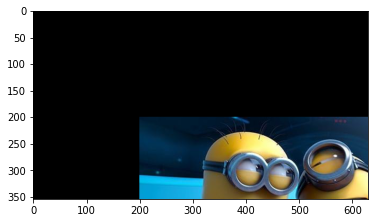

In [5]:
translated_image=trans(img,200,200)
plt.imshow(translated_image)

## ROTATION

The function takes two parameters one the image and secondly the angle of roataion on the axis

In [6]:
def rotation(image,t):
    angle=m.radians(t)                               
    cosine=m.cos(angle)
    sine=m.sin(angle)
    long=image.shape[0]                                   
    haut=image.shape[1]
    
    new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
    new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

    output=np.zeros((new_height,new_width,image.shape[2]))
  
    original_centre_height   = round(((image.shape[0]+1)/2)-1)    
    original_centre_width    = round(((image.shape[1]+1)/2)-1)   

   
    new_centre_height= round(((new_height+1)/2)-1)        
    new_centre_width= round(((new_width+1)/2)-1)          
    
    
    for i in range(long):
        for j in range(haut):
            
            y=image.shape[0]-1-i-original_centre_height                   
            x=image.shape[1]-1-j-original_centre_width 
            
            new_y=round(-x*np.sin(t)+y*np.cos(t))
            new_x=round(x*np.cos(t)+y*np.sin(t))
            
            new_y=new_centre_height-new_y
            new_x=new_centre_width-new_x
            
            if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                output[new_y,new_x,:]=image[i,j,:]     
    return p.fromarray((output).astype(np.uint8))

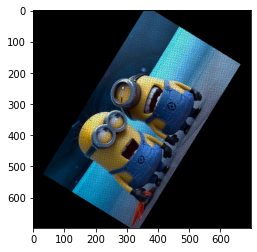

In [7]:
rotated_image=rotation(img,45)

plt.imshow(rotated_image)

## HOMOTHETIE

We start by defining a simple interpolation funtion then use the function in our HOMOTHETIE

In [8]:
#fucntion de interpolation
def don(img,c,w,k,img2):
    p=c*k
    q=w*k
    for i in range(p,p+k,1):
        for j in range(q,q+k,1):
            img[i][j]=img2[c,w]

In [9]:
def homothetie(img,k):
    long,haut,p=img.shape
    h=long*k
    w=haut*k
    imgH=np.zeros((h,w,img.shape[2])) 
    for i in range(h):
        for j in range(w):

            if(i*k<h and j*k<w): 
                don(imgH,i,j,k,img)
    return imgH

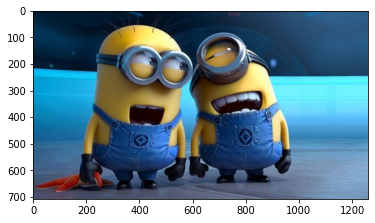

In [10]:
homothetie_image=homothetie(img,2)

plt.imshow(homothetie_image.astype('uint8'))